<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


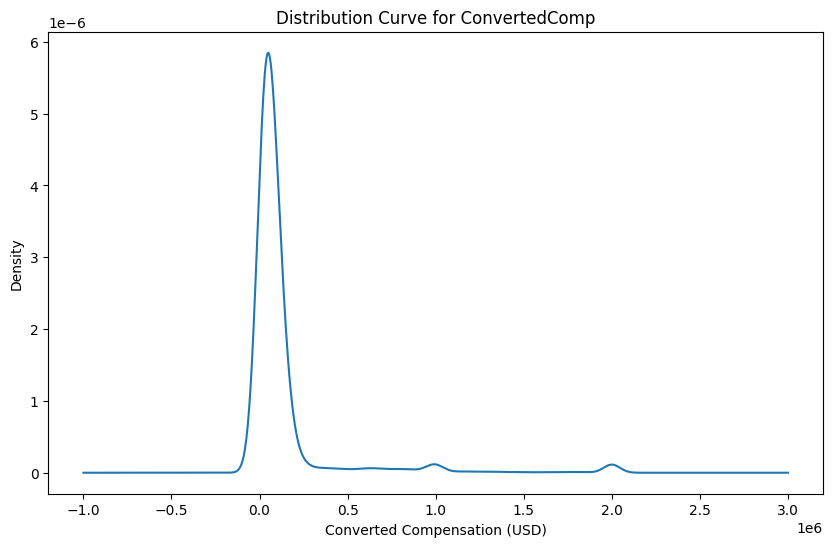

In [10]:
# your code goes here
# Plot the distribution curve for the column ConvertedComp
plt.figure(figsize=(10, 6))
df['ConvertedComp'].plot(kind='density', title='Distribution Curve for ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.show()

Plot the histogram for the column `ConvertedComp`.


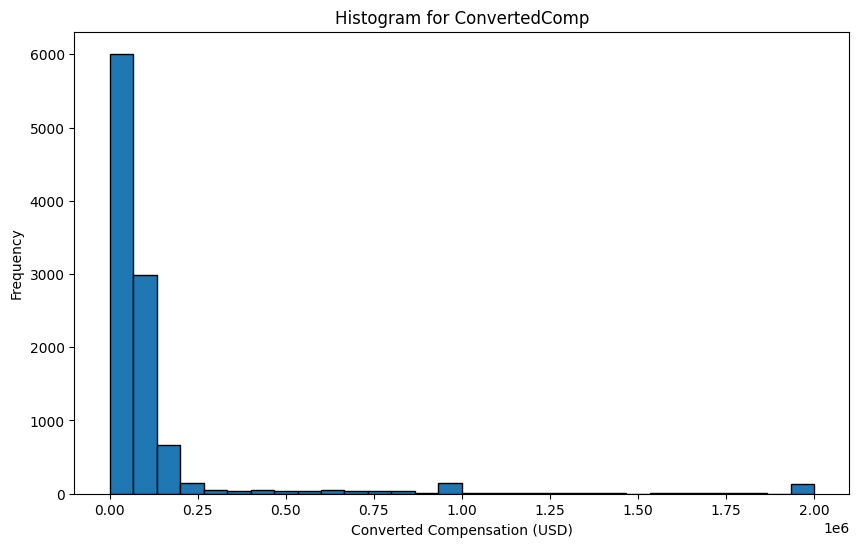

In [11]:
# your code goes here
plt.figure(figsize=(10, 6))
df['ConvertedComp'].plot(kind='hist', bins=30, edgecolor='black', title='Histogram for ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.show()

What is the median of the column `ConvertedComp`?


In [12]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()
print(f'Median of ConvertedComp: {median_converted_comp}')

Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [13]:
# your code goes here
man_count = df[df['Gender'] == 'Man'].shape[0]
print(f'Number of responders identified as Man: {man_count}')

Number of responders identified as Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
# your code goes here
median_converted_comp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f'Median ConvertedComp for responders identified as Woman: {median_converted_comp_woman}')

Median ConvertedComp for responders identified as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
# your code goes here
five_number_summary_age = df['Age'].describe().loc[['min', '25%', '50%', '75%', 'max']]
print('Five Number Summary for Age:')
print(five_number_summary_age)

Five Number Summary for Age:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


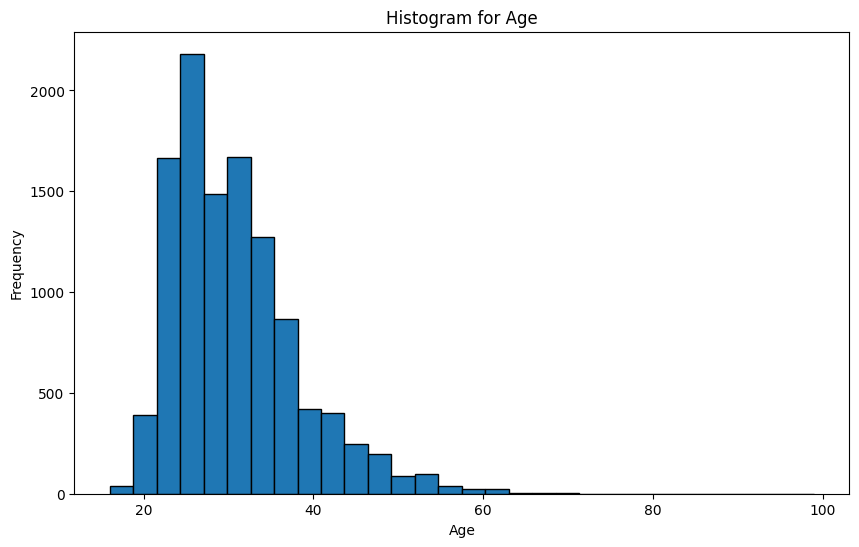

In [16]:
# your code goes here
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=30, edgecolor='black', title='Histogram for Age')
plt.xlabel('Age')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


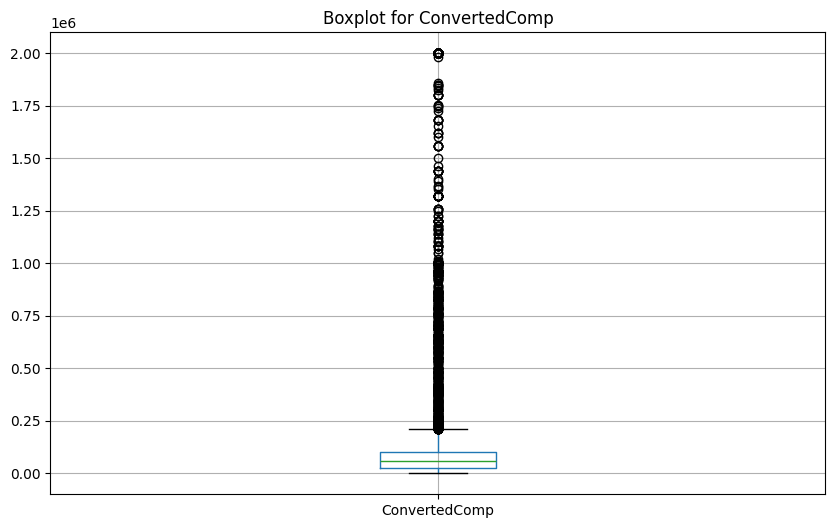

In [17]:
# your code goes here
plt.figure(figsize=(10, 6))
df.boxplot(column='ConvertedComp')
plt.title('Boxplot for ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [18]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f'Inter Quartile Range (IQR) for ConvertedComp: {IQR}')

Inter Quartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [19]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Lower Bound: -82830.0, Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [20]:
# your code goes here
outliers_count = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].shape[0]
print(f'Number of outliers in ConvertedComp: {outliers_count}')

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [23]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(f'Number of outliers in ConvertedComp: {outliers_count}')


Number of outliers in ConvertedComp: 879


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [26]:
import numpy as np

# Convert 'Age' column to numeric, replacing non-numeric values with NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Calculate correlation between 'Age' and other numerical columns
correlation_age = df.select_dtypes(include=[np.number]).corr()['Age']

print('Correlation between Age and other numerical columns:')
print(correlation_age)


Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
